In [1]:
import sys


# sys.path.insert(0, '../scripts')

import IM_rank_correlations as IMR;
import measure_classification as mc;
import compute_invariance as compute_invariance;
from Measures import map_measures_to_indices;
import numpy as np;
import csv;
from sklearn.cluster import AgglomerativeClustering

ImportError: No module named 'IM_rank_correlations'

In [3]:
# Load the rules

tables = [];
with open('rules_adult_new.csv') as csvfile:
    rule_reader = csv.reader(csvfile)
    for rule in rule_reader:
        tables.append([int(rule[0]), int(rule[2]), int(rule[3]), int(rule[1])])
        
tables = np.array(tables)

In [5]:
tables.shape

(13000, 4)

In [8]:
n_clusters = 100;
ac = AgglomerativeClustering(n_clusters=n_clusters)
clusters = ac.fit_predict(tables[:,1:4])
for i in range(n_clusters):
    if (np.mean(tables[clusters==i][:,0]) < 10) and (len(tables[clusters==i]) > 200):
        print(i, len(tables[clusters==i]), np.mean(tables[clusters==i][:,0]), np.var(tables[clusters==i][:,0]) )
#     sns.distplot(tables[clusters==i][:,0], label=str(i))
# plt.show()

22 764 2.48691099476 100.710561662
27 640 9.8640625 371.708083496
59 1152 0.251736111111 1.62239281925
90 455 5.45494505495 314.95566236


In [22]:
idx = 22;
np.mean(tables[clusters==idx][:,0]), tables[clusters==idx]

(2.4869109947643979, array([[    0,   295,     1, 48546],
        [    1,   333,     0, 48508],
        [    0,   406,     1, 48435],
        ..., 
        [   23,   932,   383, 47504],
        [    8,   975,   398, 47461],
        [  216,   735,   293, 47598]]))

In [23]:
tabs = tables[clusters==idx]

In [40]:
ranks_matrix.corr_spearman[measures_dict['coverage'], measures_dict['specificity']]

0.026858306039693396

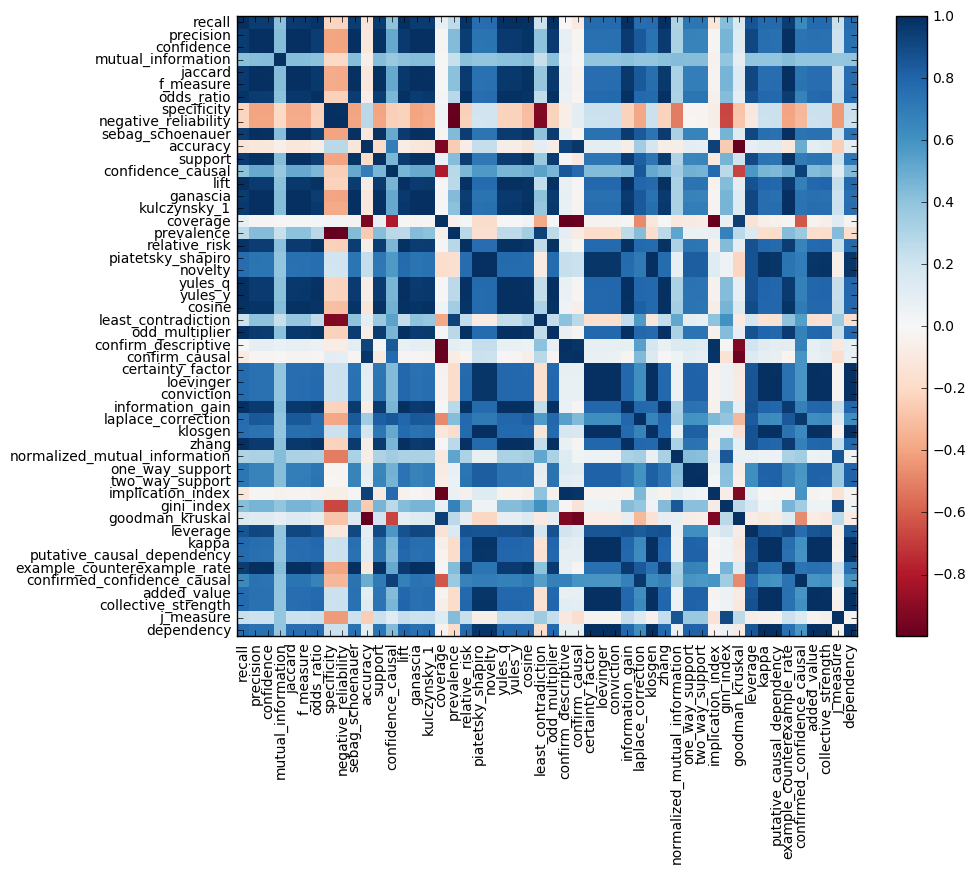

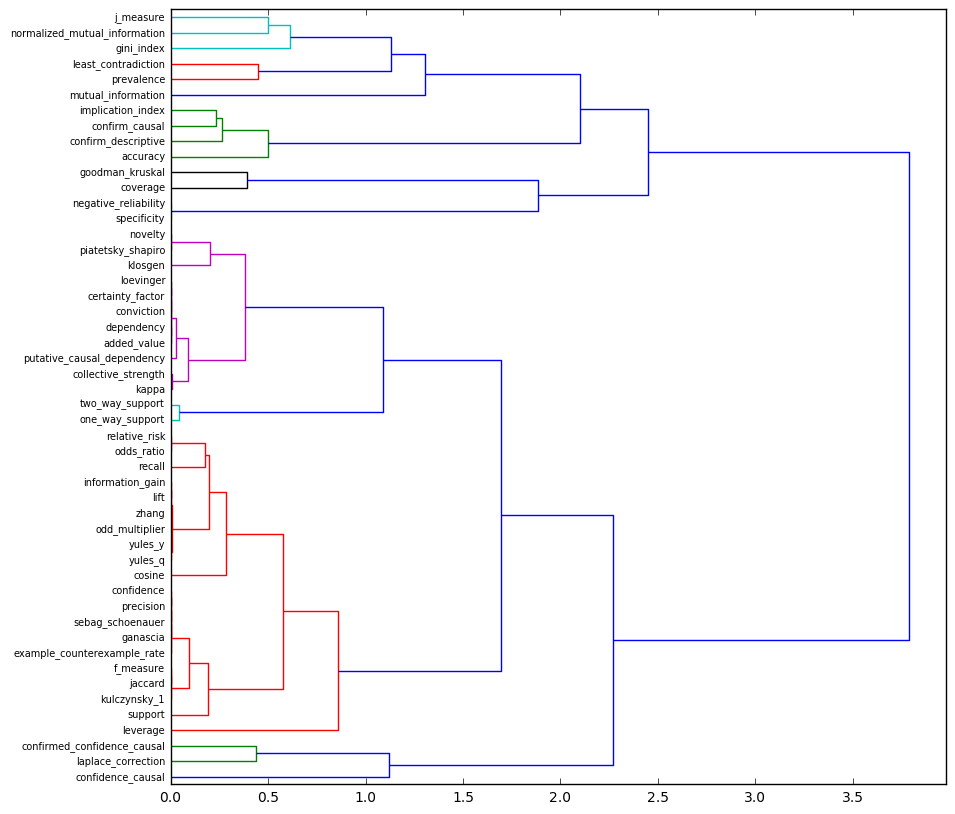

In [25]:
(measures_dict, measures_arr) = map_measures_to_indices();
(ranks_matrix, scores_matrix) = IMR.create_ranks_matrix(tabs, measures_arr);
ranks_matrix.visualize()

In [26]:
# def find_redundant(measures_arr, ranks_matrix):
# #     print(len(measures_arr))
#     for i in range(len(measures_arr)):
#         for j in range(len(measures_arr)):
#             if (i > j):
# #                 print(ranks_matrix)
#                 if (np.around(ranks_matrix.corr_spearman[i][j], 4) == 1):
#                     print(measures_arr[i],measures_arr[j], ranks_matrix.corr_spearman[i][j]);
#                     return(j);

# # remove redundant measures
# while find_redundant(measures_arr, ranks_matrix):
#     i = find_redundant(measures_arr, ranks_matrix);
#     measures_dict, measures_arr = ranks_matrix.remove_outliers(i);
    
# print(len(measures_arr))
# ranks_matrix.show_dendrogram()


In [27]:
def form_clusters(n_clusters=10, ranks_matrix=ranks_matrix):
    # n_clusters = 10;
    clusters = ranks_matrix.form_clusters(n_clusters);
    return clusters

#prints the measures list in each of the clusters
def print_cluster_set(clusters, ma):
    for idx, cluster in enumerate(clusters):
        print(len(cluster), cluster);        
        print(ma[cluster]);

#forms a cluster vector corresponding to the lengths of the clusters
def form_cluster_set(clusters):
    cluster_vector = np.empty(len(clusters), int);
    for idx, cluster in enumerate(clusters):
        cluster_vector[idx] = len(cluster);
    return cluster_vector;

In [28]:
def cluster_set_2():
    rm = IMR.ranks(scores_matrix, measures_arr);
    ma = rm.measures_arr;
    md = rm.measures_dict;
    rm.compute_correlation();
    
#     while find_redundant(ma, rm):
#         i = find_redundant(ma, rm);
#         md, ma = rm.remove_outliers(i);
    
    clusters = form_clusters(2, rm);
    return (clusters, md, ma);

(clusters_2, measures_dict_2, measures_arr_2) = cluster_set_2();

In [29]:
print_cluster_set(clusters_2, measures_arr_2)

36 [ 0  1  2  4  5  6  9 11 12 13 14 15 18 19 20 21 22 23 25 28 29 30 31 32 33
 34 36 37 41 42 43 44 45 46 47 49]
['recall' 'precision' 'confidence' 'jaccard' 'f_measure' 'odds_ratio'
 'sebag_schoenauer' 'support' 'confidence_causal' 'lift' 'ganascia'
 'kulczynsky_1' 'relative_risk' 'piatetsky_shapiro' 'novelty' 'yules_q'
 'yules_y' 'cosine' 'odd_multiplier' 'certainty_factor' 'loevinger'
 'conviction' 'information_gain' 'laplace_correction' 'klosgen' 'zhang'
 'one_way_support' 'two_way_support' 'leverage' 'kappa'
 'putative_causal_dependency' 'example_counterexample_rate'
 'confirmed_confidence_causal' 'added_value' 'collective_strength'
 'dependency']
14 [ 3  7  8 10 16 17 24 26 27 35 38 39 40 48]
['mutual_information' 'specificity' 'negative_reliability' 'accuracy'
 'coverage' 'prevalence' 'least_contradiction' 'confirm_descriptive'
 'confirm_causal' 'normalized_mutual_information' 'implication_index'
 'gini_index' 'goodman_kruskal' 'j_measure']


In [3]:
def return_homogeneity(cluster_set, measures_dict):

    #old properties
    (properties_array, property_names, support_array, entropy_array) = compute_invariance.compute_property_vectors(measures_dict);

#     # new properties
    (properties_array, property_names) = compute_invariance.compute_new_property_vectors(measures_dict);
# mapping the properties array to the combination of the properties
#     (properties_array, property_names) = compute_invariance.map_UN_properties_to_combinations(properties_array);
    (support_array, entropy_array) = compute_invariance.compute_supports_updated(properties_array);
    
    cluster_property_array = compute_invariance.compute_property_frequencies_in_cluster_set_updated(properties_array, cluster_set);
    cluster_vector = form_cluster_set(cluster_set);
    print(cluster_vector);
#     print(properties_array)
    for idx, property_vector in enumerate(cluster_property_array):
        # property_vector is (n_prop_states, n_clusters)
        homo = compute_invariance.compute_homogeneity(property_vector, cluster_vector)
        # Property names
        print(property_names[idx]);

        # Entropy of split
#         print(entropy_array[idx]);
        
    
    #-----old properties------
        # Original split of properties
#         print([int(np.sum(property_vector[1,:])), int(np.sum(property_vector[0,:]))])

#         print(support_array[idx,1]);     #prints support for each prop_state

        
        # property counts of '-1' in new and '0' in old
#         print(property_vector[0,:]);
        
        # property counts of '0' in new and '1' in old
#         print(property_vector[1,:]);
#         print(homo)        
    
    #------new properties------
        # Original split of properties
        print([int(np.sum(property_vector[0,:])),
               int(np.sum(property_vector[1,:])),
               int(np.sum(property_vector[2,:]))]);
#               int(np.sum(property_vector[3,:])),
#               int(np.sum(property_vector[4,:])),
#               int(np.sum(property_vector[5,:]))]);

#         print(support_array[idx,0]);     #prints support for each prop_state

        # property counts of '-1' in new 
        print(property_vector[0,:]);
        
        # property counts of '0' in new
        print(property_vector[1,:]);
        
        # property counts of '1' in new
        print(property_vector[2,:]);

#         print(homo)

return_homogeneity(clusters_2, measures_dict_2);